<h2 style='font-family: cursive; font-size: 40px;'>Método de la secante</h2>
<img src='https://upload.wikimedia.org/wikipedia/commons/b/be/Metodo_delle_secanti.gif' align='middle'
     width='370'>

<h3 style="font-family: 'Courier New'; font-size:25px"
    >Formulación matemática</h3>

<p style="font-size: 16px;"> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$x_n+1$ = $x_n$ - $\frac{x_n - x_n-1}{f(x_n) - f(x_n-1)} * f(x_n)$ <br> 
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$x_0, x_1 \in R$ </p>

<h3 style="font-family: 'Courier New'; font-size:25px"
    >Valores iniciales</h3>

<p style="font-size: 16px">
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$x_0$: Un punto de la recta para la aproximación.<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$x_1$: Un punto de la recta para la aproximación.<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$tol$: La exactitud de la aproximación.
</p>

<h3 style="font-family: 'Courier New'; font-size:25px"
    >Ventajas y desventajas</h3>

<table style="width:100%; text-align: left; font-size: 14px">
    <tr style="text-align: left;">
        <th style="text-align: left;">Ventajas</th>
        <th style="text-align: left;">Desventajas</th>
    </tr>
    <tr>
        <td style="text-align: left;">Se puede hacer cuando la funcion es muy compleja como para obtener su derivada.</td>
        <td style="text-align: left;">Converge muy lentamente.</td>
    </tr>
</table>

<h3 style="font-family: 'Courier New'; font-size:25px"
    >Pseudocódigo</h3>

<ol>
    <li>Para $iter$ iteraciones</li>
    <li>$den = f(x_1) - f(x_0)$</li>
    <li>Si abs(den) &lt; tol</li>
    <li>Salir y retornar resultados</li>
    <li>Sino</li>
    <li>$tmp = x_1$</li>
    <li>$x_1 = x_1 - \frac{x_1-x_0}{f(x_1) - f(x_0)} * f(x_1)$</li>
    <li>$x_0 = tmp$</li>
    <li>Fin Si</li>
    <li>Fin Para</li>
</ol>

<h3 style="font-family: 'Courier New'; font-size:25px">Octave</h3>

In [1]:
format long
function [x1,e]=secante(f,x0,x1,tol,iter)
    %Esta función aproxima la solución de la ecuación f(x)=0, utilizando el método de la secante
    %
    %Sintaxis:  secante(f,a,b,tol,iterMax)
    % 
    %Parámetros Iniciales: 
    %            f = una  cadena de caracteres (string) que representa a la función f.
    %            x0,x1 = son los extremos del intervalo [x0,x1] de la recta.
    %            tol = un número positivo que representa a la tolerancia para el criterio |f(x_k)|<tol.
    %            iter = cantidad de iteraciones máximas.
    %            
    %Parámetros de Salida:                           
    %            x1 = aproximación del cero de la función f.
    %            error =  |f(x)|.
    
    footion=str2func(strcat('@(x)',f));
    e=[];
    if tol < 10^(-8)
        display("Debe escoger una tolerancia más grande.");
    else
        for i=1:iter
            den=footion(x1)-footion(x0);
            if abs(den) < tol
                break;
            else
                tmp=x1;
                x1=x1-((x1-x0)/den)*footion(x1);
                x0=tmp;
                e=[e den];

            end
        end
    end
    plot(0:length(e)-1,e);
end

<h3 style="font-family: 'Courier New'; font-size:25px">Python</h3>

In [2]:
def iter_list(it):
    list = []
    for i in range(it):
        list.append(i)
    return list
    
    
def plot(e):
    import matplotlib.pyplot
    matplotlib.pyplot.plot(iter_list(len(e)), e)

    
def secante(f, x0, x1, tol, iter):
    """
    Esta función aproxima la solución de una ecuació f(x)=0, implementando el metodo de la Secante.
    Parametros iniciales:
    f = una  cadena de caracteres (string) que representa a la función f
    x0, x1 = son los extremos del intervalo [a,b] de la recta.
    tol = un número positivo que representa a la tolerancia para el criterio |f(x_k)|<tol.
    iter = cantidad de iteraciones máximas.
    Parámetros de Salida: 
    [x_1,error], donde                
    x_1 = aproximación del cero de la función f
    error =  |f(x_1)|
    """
    from sympy import sympify, symbols
    import matplotlib.pyplot
    
    tmp = 0
    footion = sympify(f)
    e = []
    
    if tol < 10^-8:
        print("Debe escoger una tolerancia más grande.")
    else:
        for i in range(iter):
            den = float(footion.subs({'x' : x1})) - float(footion.subs({'x' : x0}))
            e.append(den)
            if abs(den) < tol and den == 0:
                break
            else:
                tmp = x1
                x1 = x1 - ((x1 - x0) / den) * float(footion.subs({"x" : x1}));
                x0 = tmp

    plot(e)
    return x1, e

<h3 style="font-family: 'Courier New'; font-size:25px">Ejemplo Numérico</h3>

<h5 style="font-family: 'Courier New'; font-size:16px">Python</h5>

(0.8767262153950625, [0.3879545537963065, -0.23975654699563598, 0.06825558623512684, 0.014461251451302282, -0.0015114193888534633, 2.207687024347038e-05, 3.66366174064936e-08, -9.04054608952265e-13, 0.0])


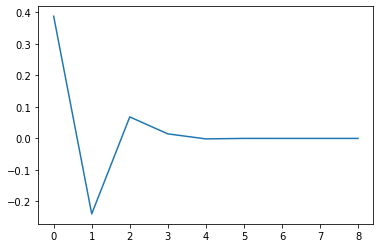

In [3]:
print(secante('x^2-sin(x)', 0.5, 1, 0.0004, 20))

<h5 style="font-family: 'Courier New'; font-size:16px">Octave</h5>

x1 =    6.529186403819336e-01
e =

 Columns 1 through 3:

  -1.632120558828558e+00   7.064343912647045e-01  -7.528368449034051e-02

 Column 4:

   9.723997050876676e-04



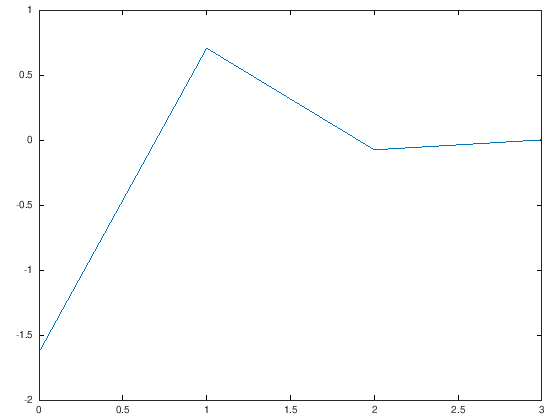

In [18]:
[x1,e]=secante('exp(-x^2)-x',0,1,0.00004,5)